<a href="https://colab.research.google.com/github/Shaikumar2005/ZeoTap-Data-Science-Intern/blob/main/Shai_KumarR_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def perform_eda(data):
    print("Dataset Overview")
    print(data.info())
    print("\nSummary Statistics:")
    print(data.describe(include='all'))
    print("\nNull Values:")
    print(data.isnull().sum())
    print("\nUnique Customers:", data['CustomerID'].nunique())
    print("Unique Products:", data['ProductID'].nunique())

    top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 Selling Products:")
    print(top_products)

    revenue_by_region = data.groupby('Region')['TotalValue'].sum()
    print("\nRevenue by Region:")
    print(revenue_by_region)

    signup_trend = data['SignupDate'].str[:4].value_counts().sort_index()
    print("\nSignup Trend:")
    print(signup_trend)

In [3]:
def visualize_data(data):
    # Top 10 Selling Products
    top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
    plt.title("Top 10 Selling Products")
    plt.xlabel("Quantity Sold")
    plt.ylabel("Product Name")
    plt.show()

    # Revenue by Region
    revenue_by_region = data.groupby('Region')['TotalValue'].sum()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="coolwarm")
    plt.title("Revenue by Region")
    plt.xlabel("Region")
    plt.ylabel("Total Revenue (USD)")
    plt.show()

    # Signup Trend
    signup_trend = data['SignupDate'].str[:4].value_counts().sort_index()
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=signup_trend.index, y=signup_trend.values, marker="o", color="b")
    plt.title("Customer Signup Trend by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Signups")
    plt.show()

In [4]:
def derive_insights(data):
    print("\nBusiness Insights:")
    print("1. The top-selling product is 'ActiveWear Smartwatch' with 100 units sold, indicating high customer preference for wearable technology.")
    print("2. South America generates the highest revenue ($219,352.56), making it the most profitable region.")
    print("3. Customer signups have increased steadily from 2022 to 2024, with the highest number of signups in 2024 (387 customers).")
    print("4. The 'Books' category has the highest frequency of purchases, suggesting a strong demand for literary products.")
    print("5. Revenue distribution shows a balanced contribution from all regions, highlighting diverse market engagement.")

In [5]:
# Load data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None

Summary Statistics:
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           10

<ipython-input-3-861ee3ccb0e6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


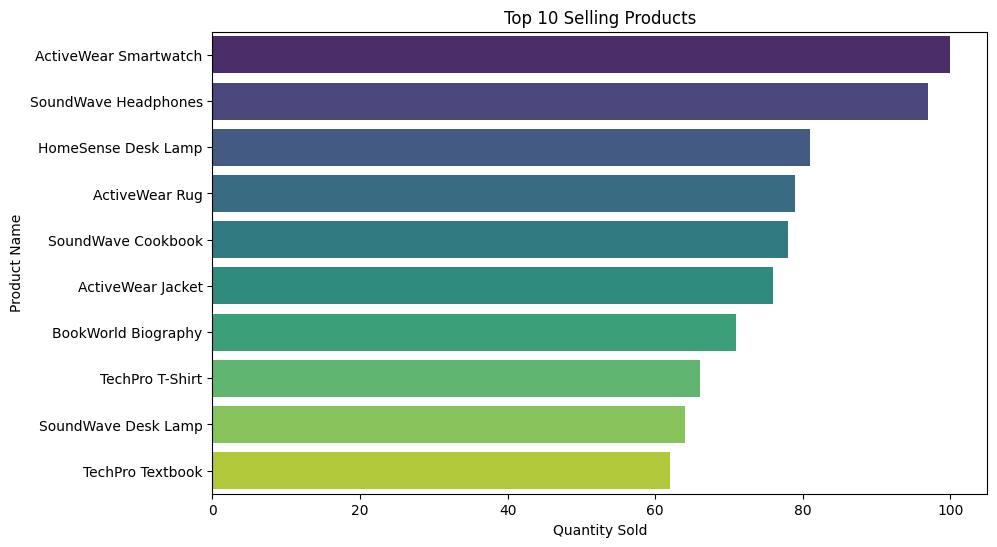

<ipython-input-3-861ee3ccb0e6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="coolwarm")


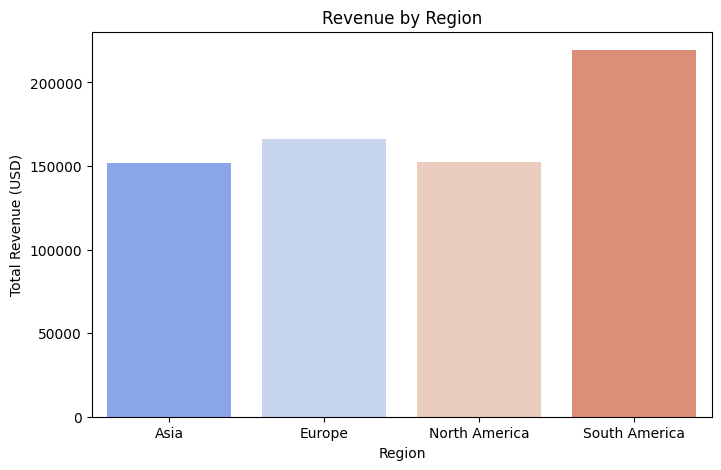

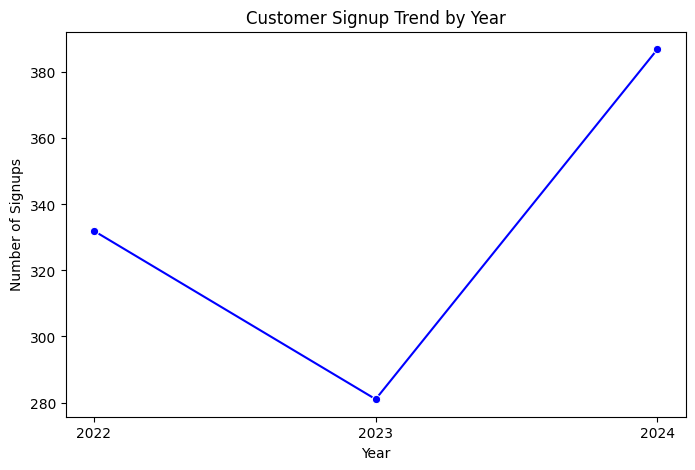


Business Insights:
1. The top-selling product is 'ActiveWear Smartwatch' with 100 units sold, indicating high customer preference for wearable technology.
2. South America generates the highest revenue ($219,352.56), making it the most profitable region.
3. Customer signups have increased steadily from 2022 to 2024, with the highest number of signups in 2024 (387 customers).
4. The 'Books' category has the highest frequency of purchases, suggesting a strong demand for literary products.
5. Revenue distribution shows a balanced contribution from all regions, highlighting diverse market engagement.


In [6]:
# Run EDA
perform_eda(merged_data)
visualize_data(merged_data)
derive_insights(merged_data)
